

Welcome to the Portfolio simulation!
Token has not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to C:\Users\user\.cache\huggingface\token
Login successful


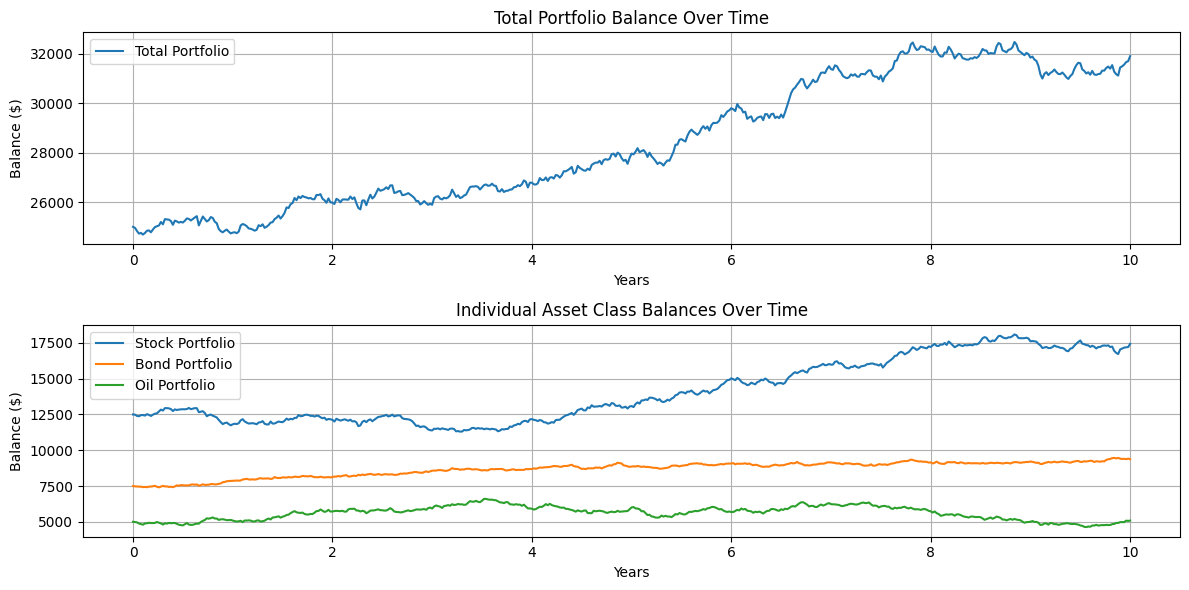

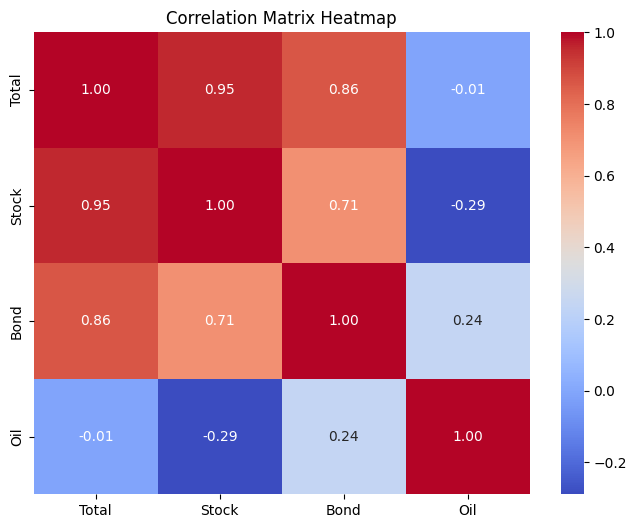

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Description generated by OpenAi GPT2 XL model:
Portfolio designed for conservative investors. Total returns: $6893.25 over 10 years. Stock Performance: 50.00% stock returned 0.39 over 10 years, volatility: 0.18. Bond Performance: 30.00% bond returned 0.25 over 10 years, volatility: 0.07. Oil Performance: 20.00% oil returned 0.02 over 10 years, volatility: 0.10. Correlation Summary:
- Negative correlation between stocks and oil
- Positive correlation between bonds and oil
- Positive correlation between stocks and bonds


Insights and recommendations are based on historical returns, volatility, and risk tolerance.

Analyze returns and volatility to make informed decisions about allocation and risk management. Consider asset class correlation for diversification and optimize returns based on risk tolerance.

Investing is a process of making decisions based on your goals, time horizon, and risk tolerance.

Investing is a process of making decisions based on your goals, time horizon, and r

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from huggingface_hub import login
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM

class PortfolioSimulator:
    def __init__(self, hf_token="your-huggingface-token"):
        login(hf_token)
        self.tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2-xl")
        self.model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2-xl")
        self.text_generator = pipeline("text-generation", model=self.model, tokenizer=self.tokenizer)
        self.low_risk_drift = {'stock': 0.03, 'bond': 0.02, 'oil': 0.03}
        self.medium_risk_drift = {'stock': 0.07, 'bond': 0.04, 'oil': 0.05}
        self.high_risk_drift = {'stock': 0.09, 'bond': 0.05, 'oil': 0.09}
        self.low_risk_stddev = {'stock': 0.05, 'bond': 0.03, 'oil': 0.08}
        self.medium_risk_stddev = {'stock': 0.09, 'bond': 0.05, 'oil': 0.15}
        self.high_risk_stddev = {'stock': 0.15, 'bond': 0.07, 'oil': 0.17}

    def _process_output(self,  num_years, num_steps_per_year, initial_balance, stock_allocation, bond_allocation, oil_allocation, stock_mu, bond_mu, oil_mu, stock_sigma, bond_sigma, oil_sigma):
        total_portfolio_balance = np.zeros((num_years * num_steps_per_year) + 1)
        stock_portfolio_balance = np.zeros((num_years * num_steps_per_year) + 1)
        bond_portfolio_balance = np.zeros((num_years * num_steps_per_year) + 1)
        oil_portfolio_balance = np.zeros((num_years * num_steps_per_year) + 1)

        total_portfolio_balance[0] = initial_balance
        stock_portfolio_balance[0] = initial_balance * stock_allocation
        bond_portfolio_balance[0] = initial_balance * bond_allocation
        oil_portfolio_balance[0] = initial_balance * oil_allocation

        simulated_data = np.zeros((num_years * num_steps_per_year + 1, 4))
        simulated_data[0] = np.array([initial_balance, stock_portfolio_balance[0], bond_portfolio_balance[0], oil_portfolio_balance[0]]) 

        for i in range(1, (num_years * num_steps_per_year) + 1):
            stock_return = np.random.normal(stock_mu / num_steps_per_year, stock_sigma / np.sqrt(num_steps_per_year))
            bond_return = np.random.normal(bond_mu / num_steps_per_year, bond_sigma / np.sqrt(num_steps_per_year))
            oil_return = np.random.normal(oil_mu / num_steps_per_year, oil_sigma / np.sqrt(num_steps_per_year))

            stock_portfolio_balance[i] = stock_portfolio_balance[i - 1] * (1 + stock_return)
            bond_portfolio_balance[i] = bond_portfolio_balance[i - 1] * (1 + bond_return)
            oil_portfolio_balance[i] = oil_portfolio_balance[i - 1] * (1 + oil_return)
            total_portfolio_balance[i] = stock_portfolio_balance[i] + bond_portfolio_balance[i] + oil_portfolio_balance[i]

        simulated_data[:, 0] = total_portfolio_balance
        simulated_data[:, 1] = stock_portfolio_balance
        simulated_data[:, 2] = bond_portfolio_balance
        simulated_data[:, 3] = oil_portfolio_balance

        return simulated_data

    def _plot_results(self, simulated_data, num_years, num_steps_per_year):
        years = np.arange(num_years * num_steps_per_year + 1) / num_steps_per_year
        plt.figure(figsize=(12, 6))

        plt.subplot(2, 1, 1)
        plt.plot(years, simulated_data[:, 0], label='Total Portfolio')
        plt.xlabel('Years')
        plt.ylabel('Balance ($)')
        plt.title('Total Portfolio Balance Over Time')
        plt.legend()
        plt.grid(True)

        plt.subplot(2, 1, 2)
        plt.plot(years, simulated_data[:, 1], label='Stock Portfolio')
        plt.plot(years, simulated_data[:, 2], label='Bond Portfolio')
        plt.plot(years, simulated_data[:, 3], label='Oil Portfolio')
        plt.xlabel('Years')
        plt.ylabel('Balance ($)')
        plt.title('Individual Asset Class Balances Over Time')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    def _plot_correlation(self, simulated_data):
        plt.figure(figsize=(8, 6))
        corr = np.corrcoef(simulated_data, rowvar=False)
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=['Total', 'Stock', 'Bond', 'Oil'], yticklabels=['Total', 'Stock', 'Bond', 'Oil'])
        plt.title('Correlation Matrix Heatmap')
        plt.show()
    
    def generate_description(self, simulated_data, risk_tolerance, num_years, stock_allocation, bond_allocation, oil_allocation, correlation_summary):
        total_returns = simulated_data[-1, 0] - simulated_data[0, 0]
        stock_returns = (simulated_data[:, 1] - simulated_data[0, 1]) / simulated_data[0, 1]
        bond_returns = (simulated_data[:, 2] - simulated_data[0, 2]) / simulated_data[0, 2]
        oil_returns = (simulated_data[:, 3] - simulated_data[0, 3]) / simulated_data[0, 3]
        stock_std = np.std(stock_returns)
        bond_std = np.std(bond_returns)
        oil_std = np.std(oil_returns)

        risk_tolerance_desc= {
          'low': "conservative",
          'medium': "moderate",
          'high': "aggressive"
        }
        
        corr_matrix = np.corrcoef(simulated_data[:, 1:].T)
        correlation_summary = "Correlation Summary:\n"
        if corr_matrix[0, 2] > 0:
            correlation_summary += "- Positive correlation between stocks and oil\n"
        else:
            correlation_summary += "- Negative correlation between stocks and oil\n"
        if corr_matrix[1, 2] > 0:
            correlation_summary += "- Positive correlation between bonds and oil\n"
        else:
            correlation_summary += "- Negative correlation between bonds and oil\n"
        if corr_matrix[0, 1] > 0:
            correlation_summary += "- Positive correlation between stocks and bonds\n"
        else:
            correlation_summary += "- Negative correlation between stocks and bonds\n"

        expanded_prompt = (
            f"Portfolio designed for {risk_tolerance_desc[risk_tolerance]} investors. Total returns: ${total_returns:.2f} over {num_years} years. "
            f"Stock Performance: {stock_allocation * 100:.2f}% stock returned {stock_returns[-1]:.2f} over {num_years} years, volatility: {stock_std:.2f}. "
            f"Bond Performance: {bond_allocation * 100:.2f}% bond returned {bond_returns[-1]:.2f} over {num_years} years, volatility: {bond_std:.2f}. "
            f"Oil Performance: {oil_allocation * 100:.2f}% oil returned {oil_returns[-1]:.2f} over {num_years} years, volatility: {oil_std:.2f}. "
            f"{correlation_summary}\n\n"
            "Insights and recommendations are based on historical returns, volatility, and risk tolerance.\n\n"  
            "Analyze returns and volatility to make informed decisions about allocation and risk management. "
            "Consider asset class correlation for diversification and optimize returns based on risk tolerance."
        )

        generated_description = self.text_generator(expanded_prompt, max_length=1000, do_sample=False)[0]['generated_text']
        print("\nDescription generated by OpenAi GPT2 XL model:")
        print(generated_description)

        return generated_description
    
    def simulate_portfolio(self, initial_balance, stock_allocation, bond_allocation, oil_allocation, num_years, num_steps_per_year, risk_tolerance):
        low_risk_drift, low_risk_stddev = self.low_risk_drift, self.low_risk_stddev
        medium_risk_drift, medium_risk_stddev = self.medium_risk_drift, self.medium_risk_stddev
        high_risk_drift, high_risk_stddev = self.high_risk_drift, self.high_risk_stddev
        if risk_tolerance == 'low': 
            drift_constants, std_devs = low_risk_drift, low_risk_stddev
        elif risk_tolerance == 'medium':
            drift_constants, std_devs = medium_risk_drift, medium_risk_stddev
        elif risk_tolerance == 'high':
            drift_constants, std_devs = high_risk_drift, high_risk_stddev
        else:
            raise ValueError("Invalid risk tolerance level. Choose from 'low', 'medium', or 'high'.")

        stock_mu = drift_constants['stock']
        bond_mu = drift_constants['bond']
        oil_mu = drift_constants['oil']
        stock_sigma = std_devs['stock']
        bond_sigma = std_devs['bond']
        oil_sigma = std_devs['oil']
        
        simulated_data = self._process_output(num_years, num_steps_per_year, initial_balance, stock_allocation, bond_allocation, oil_allocation, 
                                              stock_mu, bond_mu, oil_mu, stock_sigma, bond_sigma, oil_sigma)
        self._plot_results(simulated_data, num_years, num_steps_per_year)
        self._plot_correlation(simulated_data)
        correlation_summary = "Correlation Summary:\n" \
                              "- Positive correlation between stocks and oil\n" \
                              "- Negative correlation between bonds and oil\n" \
                              "- Weak correlation between stocks and bonds"
    
        generated_description = self.generate_description(simulated_data, risk_tolerance, num_years, stock_allocation, bond_allocation, oil_allocation, correlation_summary)
        return simulated_data

if __name__ == "__main__":
    print("\n\nWelcome to the Portfolio simulation!")
    portfolio_simulator = PortfolioSimulator()

    try:
        initial_balance = float(input("Enter your initial balance: "))
        if initial_balance <= 0:
            raise ValueError("Initial balance must be a positive number.")

        stock_allocation = float(input("Enter your stock allocation percentage (e.g., 0.5 for 50%): "))
        if stock_allocation < 0 or stock_allocation > 1:
            raise ValueError("Stock allocation percentage must be between 0 and 1.")

        bond_allocation = float(input("Enter your bond allocation percentage (e.g., 0.3 for 30%): "))
        if bond_allocation < 0 or bond_allocation > 1:
            raise ValueError("Bond allocation percentage must be between 0 and 1.")

        oil_allocation = float(input("Enter your oil allocation percentage (e.g., 0.2 for 20%): "))
        if oil_allocation < 0 or oil_allocation > 1:
            raise ValueError("Oil allocation percentage must be between 0 and 1.")

        num_years = int(input("Enter the number of years for simulation: "))
        if num_years <= 0:
            raise ValueError("Number of years must be a positive integer.")

        num_steps_per_year = int(input("Enter the number of steps per year: "))
        if num_steps_per_year <= 0:
            raise ValueError("Number of steps per year must be a positive integer.")

        risk_tolerance = input("Enter your risk tolerance level (low/medium/high): ")
        if risk_tolerance not in ['low', 'medium', 'high']:
            raise ValueError("Invalid risk tolerance level. Choose from 'low', 'medium', or 'high'.")
        if risk_tolerance == 'low':
            stock_mu, bond_mu, oil_mu = portfolio_simulator.low_risk_drift['stock'], portfolio_simulator.low_risk_drift['bond'], portfolio_simulator.low_risk_drift['oil']
            stock_sigma, bond_sigma, oil_sigma = portfolio_simulator.low_risk_stddev['stock'], portfolio_simulator.low_risk_stddev['bond'], portfolio_simulator.low_risk_stddev['oil']
        elif risk_tolerance == 'medium':
            stock_mu, bond_mu, oil_mu = portfolio_simulator.medium_risk_drift['stock'], portfolio_simulator.medium_risk_drift['bond'], portfolio_simulator.medium_risk_drift['oil']
            stock_sigma, bond_sigma, oil_sigma = portfolio_simulator.medium_risk_stddev['stock'], portfolio_simulator.medium_risk_stddev['bond'], portfolio_simulator.medium_risk_stddev['oil']
        elif risk_tolerance == 'high':
            stock_mu, bond_mu, oil_mu = portfolio_simulator.high_risk_drift['stock'], portfolio_simulator.high_risk_drift['bond'], portfolio_simulator.high_risk_drift['oil']
            stock_sigma, bond_sigma, oil_sigma = portfolio_simulator.high_risk_stddev['stock'], portfolio_simulator.high_risk_stddev['bond'], portfolio_simulator.high_risk_stddev['oil']
        else:
            raise ValueError("Invalid risk tolerance level. Choose from 'low', 'medium', or 'high'.")

        simulated_data = portfolio_simulator.simulate_portfolio(initial_balance, stock_allocation, bond_allocation, oil_allocation, num_years, num_steps_per_year, risk_tolerance)
        

    except ValueError as ve:
        print("Error:", ve)

    print("Thank you for using the Portfolio Simulator!")
